# Data Visualization

## I - Loading the data

In [1]:
# Import of librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree  import DecisionTreeClassifier

In [2]:
# Import of dataset of website transaction
# df = pd.read_csv("/home/exalis/VELIB-DATA/consolidated_dataset_2020_01_16.csv")
df = pd.read_csv("/home/exalis/VELIB-DATA/2020_01_15/2020_01_15_09:30:01.csv", sep="%")

## II - Data structure of the dataframe

In [3]:
# First exploration

print('Shape:')
print(df.shape)
print()
print('Variable description:')
print(df.info())
print()
print('Description:')
print(df.describe(include='all'))
print('Missing values:')
print()
print(df.isna().sum())
print()
print('Count of different values:')
for i in range(len(df.columns)):
    print(df.columns[i],':',len(df[df.columns[i]].unique()))

Shape:
(1393, 21)

Variable description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
Nombre de bornes disponibles      1393 non-null int64
Nombre vélo en PARK+              1393 non-null int64
Nombres de bornes en station      1393 non-null int64
PARK + activation                 1393 non-null object
densityLevel                      1393 non-null int64
Achat possible en station (CB)    1393 non-null object
Description station               1393 non-null object
maxBikeOverflow                   1393 non-null int64
Etat du Totem                     1393 non-null object
nbFreeDock                        1393 non-null int64
Nombre de vélo mécanique          1393 non-null int64
PARK +                            1393 non-null object
nbDock                            1393 non-null int64
Nombre vélo électrique            1393 non-null int64
Nombre vélo en PARK+.1            1393 non-null int64
Code de la station                139

In [4]:
# Analysis of each column structuration

for i in range(len(df.columns)):
    print(df.columns[i],":" )
    print()
    print(round(df[df.columns[i]].value_counts()/df.shape[0]*100,1))
    print()
    print("----------------------------")

Nombre de bornes disponibles :

0     14.6
17     3.7
21     3.6
22     3.3
1      3.2
      ... 
63     0.1
62     0.1
68     0.1
67     0.1
69     0.1
Name: Nombre de bornes disponibles, Length: 68, dtype: float64

----------------------------
Nombre vélo en PARK+ :

0    99.4
1     0.6
2     0.1
Name: Nombre vélo en PARK+, dtype: float64

----------------------------
Nombres de bornes en station :

0     12.9
30     4.7
20     4.7
24     3.9
25     3.9
      ... 
6      0.1
4      0.1
71     0.1
69     0.1
73     0.1
Name: Nombres de bornes en station, Length: 70, dtype: float64

----------------------------
PARK + activation :

no    100.0
Name: PARK + activation, dtype: float64

----------------------------
densityLevel :

1    90.4
0     9.6
Name: densityLevel, dtype: float64

----------------------------
Achat possible en station (CB) :

yes    55.3
no     44.7
Name: Achat possible en station (CB), dtype: float64

----------------------------
Description station :

{"code": "220

In [21]:
df.head()

,Nombre de bornes disponibles,Nombre vélo en PARK+,Nombres de bornes en station,PARK + activation,densityLevel,Achat possible en station (CB),Description station,maxBikeOverflow,Etat du Totem,nbFreeDock,...,PARK +,nbDock,Nombre vélo électrique,Nombre vélo en PARK+.1,Code de la station,Nom de la station,Etat des stations,Type de stations,geo,duedate
0,33,0,35,no,1,no,"{""code"": ""16107"", ""name"": ""Benjamin Godard - V...",0,yes,0,...,no,0,1,0,16107,Benjamin Godard - Victor Hugo,Operative,yes,"48.865983,2.275725",2018-07-15
1,49,0,52,no,1,yes,"{""code"": ""6015"", ""name"": ""André Mazet - Saint-...",55,yes,3,...,no,3,1,0,6015,André Mazet - Saint-André des Arts,Operative,yes,"48.8537558106,2.33909580857",2018-04-05
2,19,0,21,no,1,yes,"{""code"": ""9020"", ""name"": ""Toudouze - Clauzel"",...",21,yes,0,...,no,0,2,0,9020,Toudouze - Clauzel,Operative,yes,"48.8792959173,2.33736008406",2018-11-30
3,19,0,20,no,1,no,"{""code"": ""11104"", ""name"": ""Charonne - Robert e...",0,yes,0,...,no,0,0,0,11104,Charonne - Robert et Sonia Delauney,Operative,yes,"48.855907556,2.39257067442",2018-10-22
4,25,0,30,no,1,no,"{""code"": ""12109"", ""name"": ""Mairie du 12ème"", ""...",30,yes,0,...,no,0,1,0,12109,Mairie du 12ème,Operative,yes,"48.8408553118,2.38755494356",2019-03-28


## III - Data visualisation and futher analyses

In [5]:
for i in range(len(df.columns)):
    print(df.columns[i])

Nombre de bornes disponibles
Nombre vélo en PARK+
Nombres de bornes en station
PARK + activation
densityLevel
Achat possible en station (CB)
Description station
maxBikeOverflow
Etat du Totem
nbFreeDock
Nombre de vélo mécanique
PARK +
nbDock
Nombre vélo électrique
Nombre vélo en PARK+.1
Code de la station
Nom de la station
Etat des stations
Type de stations
geo
duedate


# First feature engineering for data exploration

In [11]:
# Creation of the sum of docks

df["Bornes totales"] = df["Nombres de bornes en station"] + df["nbDock"]

In [133]:
# Creation of the sum of free docks

df["Bornes libres"] = df["Nombre de bornes disponibles"] + df["nbFreeDock"]

In [14]:
# Creation of the sum of bikes

df["velos totaux"] = df["Nombre de vélo mécanique"] + df["Nombre vélo électrique"]

In [17]:
# Creation of the ratio between bikes and docs

df["ratio"] = df["velos totaux"]  / df["Bornes totales"] 

In [132]:
# Creating a ratio bike / dock without nan. If there is no dock, we state the number ratio is at 0.

df["ratio_float"] = df["ratio"].apply(lambda x: x if x>=0 else 0)

# A supprimer

In [110]:
df[df["ratio_float_2"]=="Nop"][['Nombre de bornes disponibles', 'Nombre vélo en PARK+',
       'Nombres de bornes en station', 'PARK + activation', 'densityLevel',
       'Achat possible en station (CB)', 
       'maxBikeOverflow', 'Etat du Totem', 'nbFreeDock',
       'Nombre de vélo mécanique', 'PARK +', 'nbDock',
       'Nombre vélo électrique', 'Nombre vélo en PARK+.1', 'Etat des stations',
       'Type de stations', 'duedate', 'Bornes totales', 'velos totaux', 'ratio_float_2']]

,Nombre de bornes disponibles,Nombre vélo en PARK+,Nombres de bornes en station,PARK + activation,densityLevel,Achat possible en station (CB),maxBikeOverflow,Etat du Totem,nbFreeDock,Nombre de vélo mécanique,PARK +,nbDock,Nombre vélo électrique,Nombre vélo en PARK+.1,Etat des stations,Type de stations,duedate,Bornes totales,velos totaux,ratio_float_2
53,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-03-30,0,0,Nop
178,0,0,0,no,1,no,33,yes,0,0,no,0,0,0,Close,yes,2020-02-29,0,0,Nop
237,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-01-31,0,0,Nop
258,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-03-31,0,0,Nop
290,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-12-31,0,0,Nop
324,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-01-31,0,0,Nop
368,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-03-30,0,0,Nop
397,0,0,0,no,0,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-03-30,0,0,Nop
423,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-03-31,0,0,Nop
591,0,0,0,no,1,no,0,no,0,0,no,0,0,0,Work in progress,no,2020-03-31,0,0,Nop


### 1. Nombre de bornes disponibles

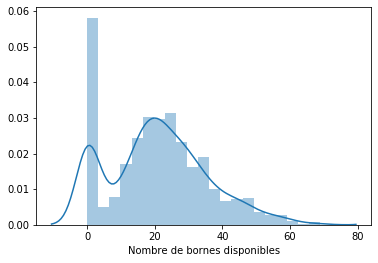

In [6]:
# Distribution 
_ = sns.distplot(df["Nombre de bornes disponibles"])

### 2. Nombre vélo en PARK+

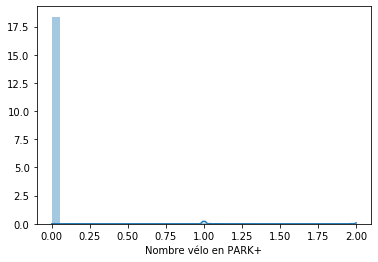

In [7]:
# Distribution 
_ = sns.distplot(df["Nombre vélo en PARK+"])

### 3. Nombres de bornes en station

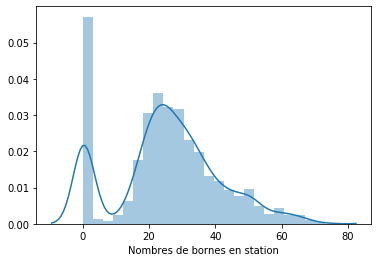

In [8]:
# Distribution
_ = sns.distplot(df["Nombres de bornes en station"])

### 4. PARK + activation

### 5. densityLevel

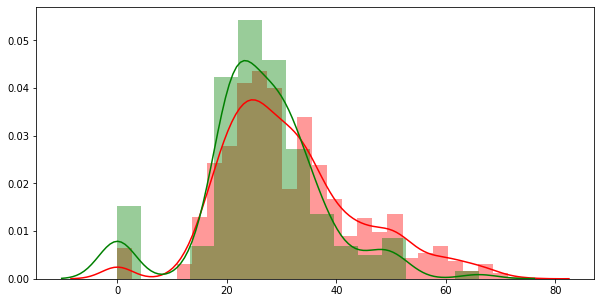

In [134]:
# Creation of a plot // Density level vs average docks

fig, axis = plt.subplots(figsize=(10,5))
sns.distplot(df[df["densityLevel"] == 1][["Bornes totales"]],ax=axis,hist=True,color="red",kde=True)
sns.distplot(df[df["densityLevel"] == 0][["Bornes totales"]],ax=axis,hist=True,color="green",kde=True)

plt.show()

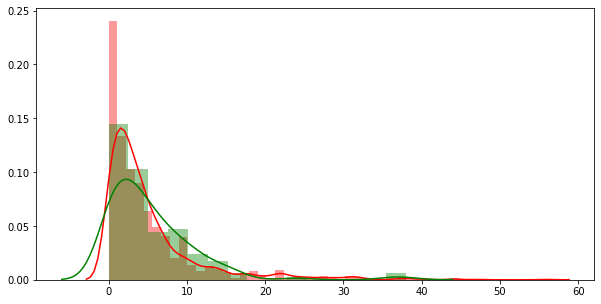

In [135]:
# Creation of a plot // Density level and total bikes

fig, axis = plt.subplots(figsize=(10,5))
sns.distplot(df[df["densityLevel"] == 1][["velos totaux"]],ax=axis,hist=True,color="red",kde=True)
sns.distplot(df[df["densityLevel"] == 0][["velos totaux"]],ax=axis,hist=True,color="green",kde=True)

plt.show()

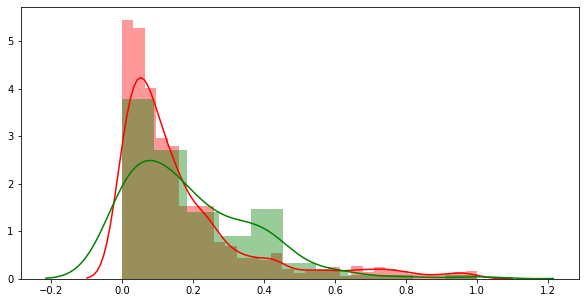

In [97]:
# Creation of a plot

fig, axis = plt.subplots(figsize=(10,5))
sns.distplot(df[df["densityLevel"] == 1][["ratio_float"]],ax=axis,hist=True,color="red",kde=True)
sns.distplot(df[df["densityLevel"] == 0][["ratio_float"]],ax=axis,hist=True,color="green",kde=True)

plt.show()

### 7. Description station

### 8. maxBikeOverflow

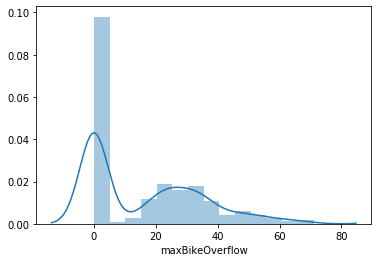

In [12]:
# Distribution
_ = sns.distplot(df["maxBikeOverflow"])

### 9. Etat du Totem

In [139]:
df[df["Etat du Totem"]=="no"]

,Nombre de bornes disponibles,Nombre vélo en PARK+,Nombres de bornes en station,PARK + activation,densityLevel,Achat possible en station (CB),Description station,maxBikeOverflow,Etat du Totem,nbFreeDock,...,Type de stations,geo,duedate,Bornes totales,velos totaux,ratio,ratio int,ratio_float,ratio_float_2,Bornes libres
53,0,0,0,no,1,no,"{""code"": ""42027"", ""name"": ""Verdun - Pierre et ...",0,no,0,...,no,"48.8127388528,2.37079328705",2020-03-30,0,0,NaN,NaN,0.0,Nop,0
179,31,0,31,no,1,no,"{""code"": ""33020"", ""name"": ""Waldeck Rochet - Ge...",0,no,0,...,yes,"48.9110510082,2.36764993519",2020-01-31,31,0,0.0,0.0,0.0,0,31
237,0,0,0,no,1,no,"{""code"": ""5124"", ""name"": ""Ulm - Louis Thuillie...",0,no,0,...,no,"48.842647,2.344593",2020-01-31,0,0,NaN,NaN,0.0,Nop,0
258,0,0,0,no,1,no,"{""code"": ""2111"", ""name"": ""Chabanais - Petits C...",0,no,0,...,no,"48.867281,2.336729",2020-03-31,0,0,NaN,NaN,0.0,Nop,0
290,0,0,0,no,1,no,"{""code"": ""13124"", ""name"": ""Italie - Place d'It...",0,no,0,...,no,"48.829234102,2.35621151287",2020-12-31,0,0,NaN,NaN,0.0,Nop,0
324,0,0,0,no,1,no,"{""code"": ""32017"", ""name"": ""Basilique"", ""state""...",0,no,0,...,no,"48.9362689106,2.35886668202",2020-01-31,0,0,NaN,NaN,0.0,Nop,0
368,0,0,0,no,1,no,"{""code"": ""16138"", ""name"": ""Saint-Cloud - Hippo...",0,no,0,...,no,"48.8583409421,2.25815176964",2020-03-30,0,0,NaN,NaN,0.0,Nop,0
397,0,0,0,no,0,no,"{""code"": ""16140"", ""name"": ""Longchamp - Suresne...",0,no,0,...,no,"48.8630082862,2.24082814273",2020-03-30,0,0,NaN,NaN,0.0,Nop,0
423,0,0,0,no,1,no,"{""code"": ""17123"", ""name"": ""Clichy - Lechapelai...",0,no,0,...,no,"48.8993920671,2.33194202185",2020-03-31,0,0,NaN,NaN,0.0,Nop,0
591,0,0,0,no,1,no,"{""code"": ""20201"", ""name"": ""Eugène Reisz - Davo...",0,no,0,...,no,"48.8565258226,2.41053133827",2020-03-31,0,0,NaN,NaN,0.0,Nop,0


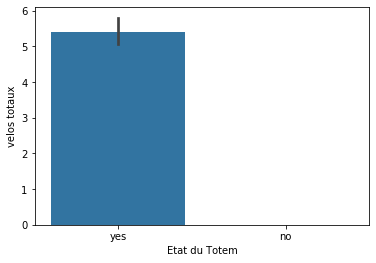

In [142]:
_ = sns.barplot(x = "Etat du Totem", y="velos totaux", data=df)

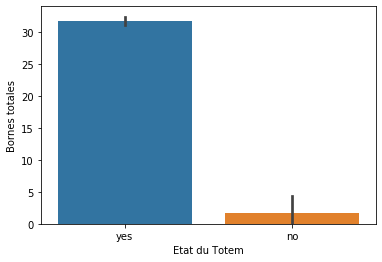

In [140]:
_ = sns.barplot(x = "Etat du Totem", y=df["Bornes totales"], data=df)

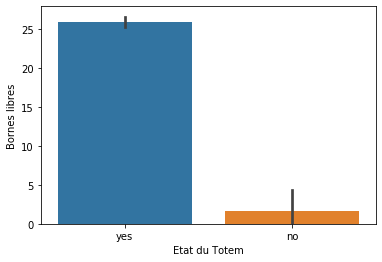

In [143]:
_ = sns.barplot(x = "Etat du Totem", y=df["Bornes libres"], data=df)

If the totem does not work, there can be some docks but there are no bikes availiables.

### 10. nbFreeDock

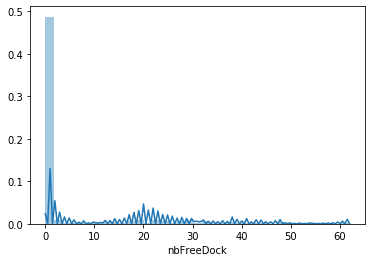

In [14]:
# Distribution
_ = sns.distplot(df["nbFreeDock"])

### 11. Nombre de vélo mécanique

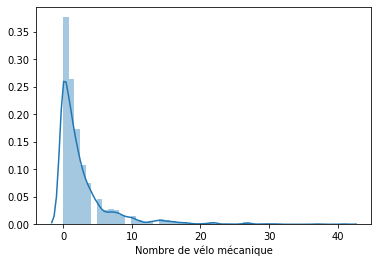

In [15]:
# Distribution
_ = sns.distplot(df["Nombre de vélo mécanique"])

### 12. PARK +

### 13. nbDock

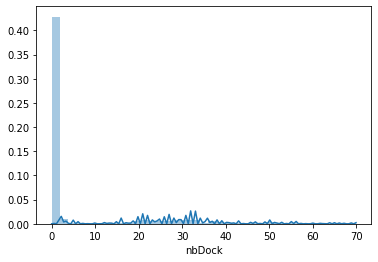

In [16]:
# Distribution
_ = sns.distplot(df["nbDock"])

### 14. Nombre vélo électrique

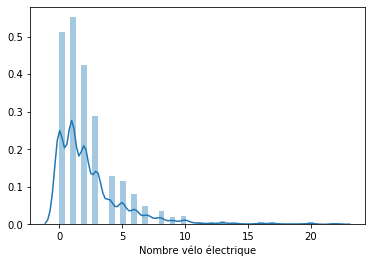

In [17]:
# Distribution
_ = sns.distplot(df["Nombre vélo électrique"])

### 15. Nombre vélo en PARK+

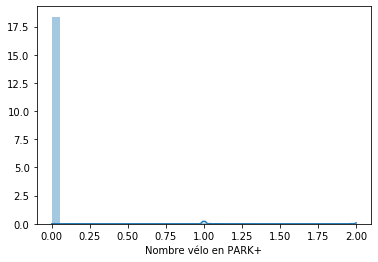

In [18]:
# Distribution
_ = sns.distplot(df["Nombre vélo en PARK+"])

### 16. Code de la station

### 17. Nom de la station

### 18. Etat des stations

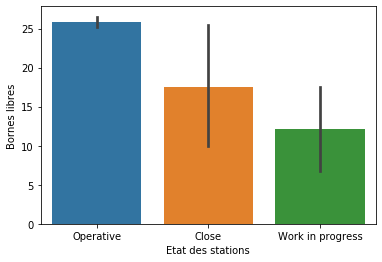

In [148]:
_ = sns.barplot(x = "Etat des stations", y="Bornes libres", data=df)

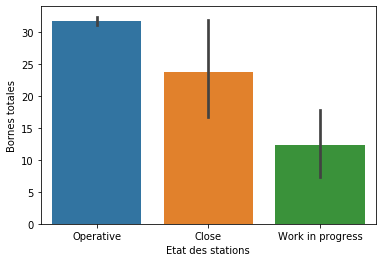

In [147]:
_ = sns.barplot(x = "Etat des stations", y="Bornes totales", data=df)

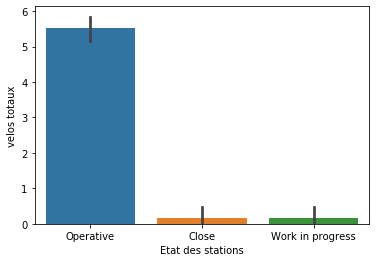

In [146]:
_ = sns.barplot(x = "Etat des stations", y="velos totaux", data=df)

With some exception, there are no bikes on closed or WIP stations. However, docks exist.

### 19. Type de stations

In [ ]:
# Distribution
_ = sns.distplot(df["Type de stations"])

### 20. geo

### 21. duedate

# First conclusions

### Data Analysis:

Global comments: no missing values other the lines. 1393 lines, 21 columns.

Detail analysis:
- "Nombre de bornes disponibles" : bewteen 0 et 68, mean at 21, std at 15. #Add additional comment
- "Nombre vélo en PARK+" : overwhelming majority at 0, but some values at 1 and 2. We can infer they are mistakes: people try PARK+, not knowing it does not work. Probably used for keeping tracks of the real number of bikes.
- "Nombres de bornes en station": between 0 and 73, mean at 26, std at 16. #Add additional comment
- "PARK + activation" : 100% of "no". This feature was the possibility to link bikes between them when docks are not available, but it was not implemented in the end.
- "densityLevel" : binary, 0 ou 1.
- "Achat possible en station (CB)" : "yes" (55%) / "no" (45%).
- "Description station" : includes information already elsewhere, like name, coordonates...
- "maxBikeOverflow" : ?
- "Etat du Totem" : yes (98%) /no (2%). We can infer it is whether it works.
- "nbFreeDock": number of availiable docks.
- "Nombre de vélo mécanique" : number of regular bikes at the station.
- "PARK +": 3 stations have the tag "yes", all the others "no".
- "nbDock": number of docks total.
- "Nombre vélo électrique": number of electric bikes at the station
- "Nombre vélo en PARK+.1": same column as ""Nombre vélo en PARK+".
- "Code de la station": the id of the station, transparent.
- "Nom de la station": name of the station, transparent.
- "Etat des stations": Operative (96%), Work in progress (3%), Close (1%).
- "Type de stations" : yes (91%), no (9%).
- "geo" : GPS coordinates. All are differents, which is logical. 
- "duedate" : we can infer it is the deadline to make the station work during initial works.

Graphique: Etat du totem
Bornes et état de la station

We can delete:
- Park+ Activation : 100% of no, so no info
- Station description : the description is already present in other fileds
- maxBikeOverflow: this feature is quite rare and is not meant to be used.
- duedate : évolue au cours du temps : est-ce qu'il faut l'évaluer? Etudier l'évolution au court  du temps
- "Nombre vélo en PARK+.1": the data already exists in "Nombre vélo en PARK+"


In [ ]:
corrélation:
    Etat Station/ Nombre de bornes disponibles/ Etat du totem /
    Etat du Totem

A creuser:
Type de station no: pas de bornes, doc, work in process
Type de station yes: il y a des bornes

### SYNTHESIS OF VARIABLES:

|French labels | English labels | Class | Decision |
|------|------|------|------|
|Nombre de bornes disponibles | nbfreeedock |Vélo |
|Nombre vélo en PARK+ | nbbikeoverflow |PARK+ | Delete
|Nombres de bornes en station |nbedock |Bornes |
|PARK + activation | overflowactivation |PARK+ |Delete
|densityLevel | densityLevel | Station |
|Achat possible en station (CB) |creditcard | Station |
|Description station |station |Station | Delete
|maxBikeOverflow |maxBikeOverflow |PARK+ | Delete
|Etat du Totem |kioskstate |Station |
|nbFreeDock | nbFreeDock |Bornes |
|Nombre de vélo mécanique |nbbike |Vélo |
|PARK + | overflow |PARK+ | Delete
|nbDock	| nbdock |Bornes |
|Nombre vélo électrique |nbebike |Vélo |
|Nombre vélo en PARK+ |nbbikeeoverflow |PARK+ |Delete
|Code de la station |station_code |Clé primaire |
|Nom de la station |station_name |Station |
|Etat des stations |station_state |Station |
|Type de stations |station_type |Station | ?
|geo |geo | Location|
|duedate |duedate |? | Delete

# Bakcup Stat

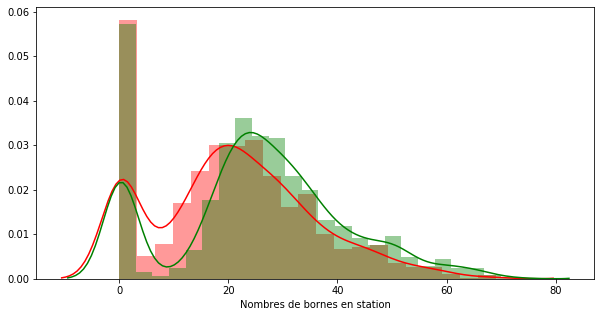

In [26]:
# Creation of a plot

fig, axis = plt.subplots(figsize=(10,5))
sns.distplot(df["Nombre de bornes disponibles"],ax=axis,hist=True,color="red",kde=True)
sns.distplot(df["Nombres de bornes en station"],ax=axis,hist=True,color="green",kde=True)

plt.show()


## Mix analysis

In [27]:
df_analysis = df[df["Type de stations"]=="no"]

,Nombre de bornes disponibles,Nombre vélo en PARK+,Nombres de bornes en station,PARK + activation,densityLevel,Achat possible en station (CB),Description station,maxBikeOverflow,Etat du Totem,nbFreeDock,...,PARK +,nbDock,Nombre vélo électrique,Nombre vélo en PARK+.1,Code de la station,Nom de la station,Etat des stations,Type de stations,geo,duedate
7,0,0,0,no,1,yes,"{""code"": ""17026"", ""name"": ""Jouffroy d'Abbans -...",41,yes,36,...,no,40,3,0,17026,Jouffroy d'Abbans - Wagram,Operative,no,"48.8819732984,2.30113215744",2018-02-28
31,0,0,0,no,1,yes,"{""code"": ""17025"", ""name"": ""Chazelles - Courcel...",35,yes,26,...,no,35,5,0,17025,Chazelles - Courcelles,Operative,no,"48.879406605,2.30344556272",2018-03-20
41,0,0,0,no,1,no,"{""code"": ""19033"", ""name"": ""Cambrai - Benjamin ...",44,yes,38,...,no,43,2,0,19033,Cambrai - Benjamin Constant,Operative,no,"48.8959473685,2.38113380225",2018-03-15
42,0,0,0,no,1,yes,"{""code"": ""17048"", ""name"": ""De Toqueville - Ter...",30,yes,30,...,no,30,0,0,17048,De Toqueville - Terrasse,Operative,no,"48.882428,2.314002",2019-05-08
53,0,0,0,no,1,no,"{""code"": ""42027"", ""name"": ""Verdun - Pierre et ...",0,no,0,...,no,0,0,0,42027,Verdun - Pierre et Marie Curie,Work in progress,no,"48.8127388528,2.37079328705",2020-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,0,0,0,no,1,yes,"{""code"": ""43004"", ""name"": ""Montreuil - Républi...",25,yes,23,...,no,25,1,0,43004,Montreuil - République,Operative,no,"48.8502634946,2.43452042341",2018-04-14
1350,0,0,0,no,1,no,"{""code"": ""21207"", ""name"": ""Verdier - Républiqu...",29,yes,23,...,no,29,3,0,21207,Verdier - République,Operative,no,"48.8154037663,2.31739372015",2018-06-30
1351,0,0,0,no,1,no,"{""code"": ""16033"", ""name"": ""Marché d'Auteuil"", ...",32,yes,29,...,no,32,2,0,16033,Marché d'Auteuil,Operative,no,"48.8484276137,2.26525382116",2018-03-22
1353,0,0,0,no,1,no,"{""code"": ""15044"", ""name"": ""Dantzig - Lefebvre""...",33,yes,32,...,no,33,1,0,15044,Dantzig - Lefebvre,Operative,no,"48.8301392159,2.29593403637",2019-07-28


# Decision tree

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Creation of a rapid logistic regression to ass the model

# Declaration fo target and features_list

target_variable = 'Type de stations'
features_list = ['Etat du Totem','Achat possible en station (CB)','Etat des stations']

#'Achat possible en station (CB)'

#features_list = df_country_risk_model.columns.drop(target_variable).drop('country_count').drop('fraud_count').drop('country').drop('fraud_proportion').drop('country_proportion')
print(features_list)
#X = df.loc[:, features_list]
#y = df.loc[:, target_variable]

X = df[features_list]
y = df[target_variable]
# Distinction of categorical features
# (string values, columns index for numpy use)

categorical_features_str = (X.select_dtypes(include=['object']).columns)
categorical_features = [X.columns.get_loc(i) for i in categorical_features_str]

print('categorical columns:',categorical_features)

# Distinction of numeric features 

numeric_features_str = X.columns.drop(categorical_features_str)
numeric_features = [X.columns.get_loc(i) for i in numeric_features_str]

print('numeric columns:',numeric_features)

# Declaration of the categorical and numeric transfomers

categorical_transformer = OneHotEncoder(drop='first')
#categorical_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

# Declaration of the feature encoder

feature_encoder = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]
)

# Fit of the encoder on X_train and transform of X_train

# Fit on X_train

feature_encoder.fit(X)


# Transformation of X_test
X = feature_encoder.transform(X)

['Etat du Totem', 'Achat possible en station (CB)', 'Etat des stations']
categorical columns: [0, 1, 2]
numeric columns: []


In [13]:
classifier_gini = DecisionTreeClassifier(criterion="gini", max_depth=4)
classifier_gini.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
feature_names_list = ['Etat du Totem','Achat possible en station (CB)','Etat des stations','Etat des stations B']

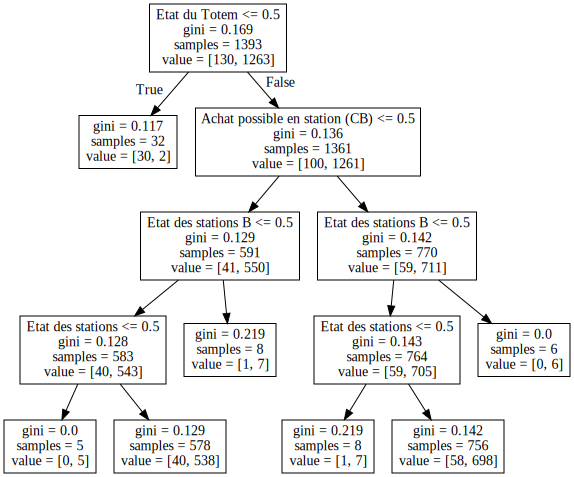

In [17]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(classifier_gini, out_file=None, feature_names=feature_names_list) 
graph = graphviz.Source(dot_data) 
graph

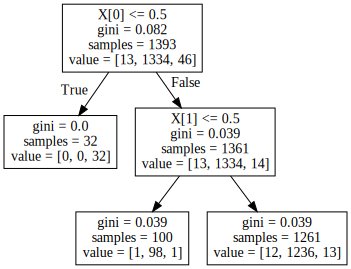

In [123]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(classifier_gini) 
graph = graphviz.Source(dot_data) 
graph

In [119]:
y.unique()

array(['Operative', 'Close', 'Work in progress'], dtype=object)

In [55]:
from sklearn.tree import graphviz

ImportError: cannot import name 'graphviz' from 'sklearn.tree' (/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/tree/__init__.py)